In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import optimize
import sympy as sym
from sympy.plotting import plot
import numpy as np

%matplotlib inline

In [2]:
layer=1
equi_n=[16,4,16,4]
n_equi=len(equi_n)
n_atom=sum(equi_n)*layer
p_n_atom=108
ss0=(4.0414*1.5866695003000000)**2

In [3]:
M=26.98
hbar=4.136*10**(-15)/2/math.pi
har=4.136*10**(-15)
kb=8.617 * 10**(-5)
Na=6.0221367*10**(23)

In [4]:
ev=1.60218*10**(-19) #J

In [5]:
perfect=[
 [ -2, n_atom, -401.38909,    2.91414,    2.91400,    2.91414],
    [ 0, n_atom, -403.18033,    2.27343,    2.27300,    2.27243],
    [ 2, n_atom, -401.89254,    1.87579,    1.87571,    1.87557],
    [ 4, n_atom, -398.11977,    1.42171,    1.42157,    1.42193]]

In [6]:
X=[]
Y=[]
for data in perfect:
    X.append(data[0]/100)
    Y.append(data[3])

## fitting

https://qiita.com/maskot1977/items/e4f5f71200180865986e

In [7]:
def func3(X, a, b, c, d): # 3次式近似
    Y = a + b * X + c * X ** 2 + d * X ** 3
    return Y

In [8]:
def func2(X, a, b, c): # 2次式近似
    Y = a + b * X + c * X ** 2
    return Y

In [9]:
popt, pcov = curve_fit(func2,X,Y) # poptは最適推定値、pcovは共分散
popt

array([  2.3183565 , -26.70752507, 116.64375325])

In [10]:
x=sym.symbols('x')

In [11]:
ks=popt[0]+popt[1]*x+popt[2]*x**2
ks

116.643753250296*x**2 - 26.7075250691843*x + 2.31835649874167

In [12]:
xx = np.linspace(-0.04, 0.06, 100)
yy=[]
for _x  in xx:
    yy.append(ks.subs(x,_x))

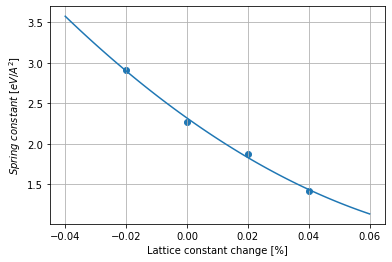

In [13]:
fig, ax = plt.subplots()
ax.set_xlabel('Lattice constant change [%]')  # x軸ラベル
ax.set_ylabel(r"$Spring\;constant\;[eV/A^2]$")  # y軸ラベル
# ax.set_title(r'$\sin(x)$ and $\cos(x)$') # グラフタイトル
ax.grid() 
ax.plot(xx,yy)
ax.scatter(X,Y)

In [14]:
X=[]
Y=[]
for data in perfect:
    X.append(data[0]/100)
    Y.append(data[2])

In [15]:
popt, pcov = curve_fit(func3,X,Y) # poptは最適推定値、pcovは共分散
popt

/Users/kyohei/miniforge3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([-4.03180330e+02, -7.63583333e+00,  3.84878750e+03, -1.23760417e+04])

In [16]:
e0=popt[0]+popt[1]*x+popt[2]*x**2+popt[3]*x**3
e0

-12376.0416666693*x**3 + 3848.78750000012*x**2 - 7.63583333333341*x - 403.18033

In [17]:
xx = np.linspace(-0.04, 0.06, 100)
yy=[]
for _x  in xx:
    yy.append(e0.subs(x,_x))

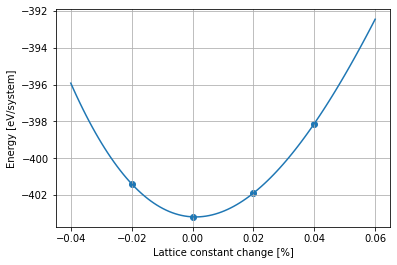

In [18]:
fig, ax = plt.subplots()
ax.set_xlabel('Lattice constant change [%]')  # x軸ラベル
ax.set_ylabel('Energy [eV/system]')  # x軸ラベル
# ax.set_title(r'$\sin(x)$ and $\cos(x)$') # グラフタイトル
ax.grid() 
ax.plot(xx,yy)
ax.scatter(X,Y)

In [19]:
def p_FreeE(vol,Temp):
    k=ks.subs(x,vol)
    KK=2*k*ev*(10**(10))**2 #J/m^2
    nu=1/(2*math.pi)*sym.sqrt(KK/(M*10**(-3)/Na)); #frequency, omega:angular velocity
    ee=har*nu/(kb*Temp)
    FF1=-kb*Temp*sym.log(sym.exp(-ee/2)/(1-sym.exp(-ee)))
    return e0.subs(x,vol)/p_n_atom+3*FF1

In [20]:
vol=sym.symbols('vol')

In [21]:
X0=np.linspace(-0.025,0.045,100);

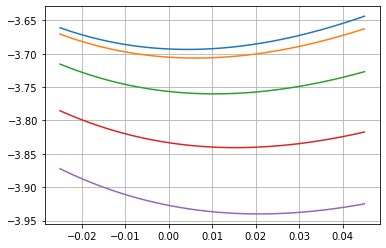

In [22]:
fig, ax = plt.subplots()
ax.grid() 
for T in [10,200,400,600,800]:
    lambdifyFunc = sym.lambdify(vol, p_FreeE(vol,T))
    ax.plot(X0,lambdifyFunc(X0))

In [23]:
def bisection(func,x0,x1,loop=10):
    f0=func.subs(vol,x0)
    f1=func.subs(vol,x1)
    for i in range(loop):
        x_tmp=(x0+x1)/2
        f_tmp=func.subs(vol,x_tmp)
        if f0.evalf()<f1.evalf():
            x1=x_tmp
            f1=f_tmp
        else:
            x0=x_tmp
            f0=f_tmp
    return x_tmp

In [24]:
sol0=[]
t_v=[]
for temp in [1,10,20,40,60,100,200,300,400,500,600,700,800]:
    eq=p_FreeE(vol,temp)
    vol0=bisection(eq,0.0,0.04,100)
    sol0.append([vol0,p_FreeE(vol0,temp)])
    t_v.append([temp,vol0])

In [25]:
sol0

[[0.0042869853229785815, -3.69358724905472],
 [0.004286984205245972, -3.69358724905472],
 [0.0042869842052278544, -3.69358725038638],
 [0.004290344715118409, -3.69359249860059],
 [0.004329412132501603, -3.69368631264726],
 [0.004623675346374511, -3.69486556310544],
 [0.006192402839660643, -3.70651043104879],
 [0.008233994990587239, -3.72915813617862],
 [0.010481211990118023, -3.76014316480208],
 [0.01286791324615457, -3.79769937191575],
 [0.015373406335729669, -3.84067919092439],
 [0.017990927100181332, -3.88829376224803],
 [0.02071860299445688, -3.93997317956603]]

In [26]:
t_v

[[1, 0.0042869853229785815],
 [10, 0.004286984205245972],
 [20, 0.0042869842052278544],
 [40, 0.004290344715118409],
 [60, 0.004329412132501603],
 [100, 0.004623675346374511],
 [200, 0.006192402839660643],
 [300, 0.008233994990587239],
 [400, 0.010481211990118023],
 [500, 0.01286791324615457],
 [600, 0.015373406335729669],
 [700, 0.017990927100181332],
 [800, 0.02071860299445688]]

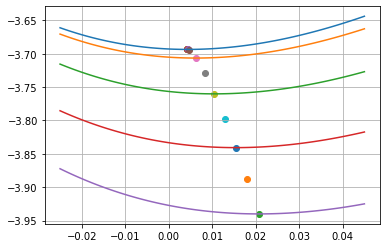

In [27]:
fig, ax = plt.subplots()
ax.grid() 
for T in [10,200,400,600,800]:
    lambdifyFunc = sym.lambdify(vol, p_FreeE(vol,T))
    ax.plot(X0,lambdifyFunc(X0))
for i in range(len(sol0)):
    ax.scatter(sol0[i][0],sol0[i][1])

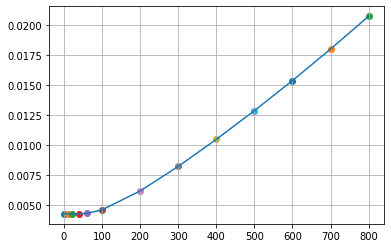

In [28]:
fig, ax = plt.subplots()
ax.grid() 
X=[]
Y=[]
for i in range(len(t_v)):
    X.append(t_v[i][0])
    Y.append(t_v[i][1])
    ax.scatter(t_v[i][0],t_v[i][1])
    
ax.plot(X,Y)

In [29]:
-720/200

-3.6

In [30]:
# 修正版 2021/07/14/15:39

vol_m2=[
[ 5, n_atom, -146.93360,    3.00307,    3.06957,    2.75657],
[ 9, n_atom, -146.93361,    2.99529,    2.99607,    3.24443],
[19, n_atom, -146.93365,    2.87214,    2.55400,    3.73979],
[ 6, n_atom, -146.93357,    1.97521,    1.97414,    2.07686]]

# [no,        E_0,        k_x,        k_y,        k_z],
vol_0=[
[ 5, n_atom, -147.61267,    2.40850,    2.44243,    2.17857],
[ 9, n_atom, -147.61263,    2.36507,    2.37257,    2.58264],
[19, n_atom, -147.61274,    2.30050,    2.07829,    3.03979],
[ 6, n_atom, -147.61269,    1.53150,    1.53493,    1.61014]]


# [no,        E_0,        k_x,        k_y,        k_z],
vol_2=[
[ 5, n_atom, -147.14819,    1.88179,    1.92786,    1.68950],
[ 9, n_atom, -147.14820,    1.86107,    1.86514,    2.01686],
[19, n_atom, -147.14823,    1.79164,    1.68264,    2.45914],
[ 6, n_atom, -147.14815,    1.17764,    1.17757,    1.19407]]

# [no,        E_0,        k_x,        k_y,        k_z],
vol_4=[
[ 5, n_atom, -145.77185,    1.45764,    1.50650,    1.29079],
[ 9, n_atom, -145.77186,    1.43807,    1.44029,    1.55486],
[19, n_atom, -145.77189,    1.35371,    1.35250,    1.97707],
[ 6, n_atom, -145.77185,    0.90214,    0.90457,    0.85857]];

In [31]:
ks_all_data=[[-0.02, vol_m2],[0,vol_0],[0.02,vol_2],[0.04,vol_4]]
# ks_all_data=[[-0.04, vol_m4],[-0.02, vol_m2],[0,vol_0],[0.02,vol_2],[0.04,vol_4]]

In [32]:
def second_or_third(x_data,y_data,poly):
    if poly=='second':
        popt, pcov = curve_fit(func2,x_data,y_data) 
        eq_fit=popt[0]+popt[1]*x+popt[2]*x**2
    elif poly=='third':
        popt, pcov = curve_fit(func3,x_data,y_data) 
        eq_fit=popt[0]+popt[1]*x+popt[2]*x**2+popt[3]*x**3
    return eq_fit

In [33]:
def point_plot(x_data,y_data):
    fig, ax = plt.subplots()
    ax.grid() 
    ax.scatter(x_data,y_data)
    plt.close(fig)
    return fig

def curve_plot(f,x_min,x_max):
    xx = np.linspace(x_min, x_max, 100)
    yy=[]
    for _x  in xx:
        yy.append(f.subs(x,_x))
    fig, ax = plt.subplots()
    ax.grid() 
    ax.plot(xx,yy)
    plt.close(fig)
    return fig

def point_curve_plot(x_data,y_data,f,x_min,x_max):
    xx = np.linspace(x_min, x_max, 100)
    yy=[]
    for _x  in xx:
        yy.append(f.subs(x,_x))
    fig, ax = plt.subplots()
    ax.grid() 
    ax.plot(xx,yy)
    ax.scatter(x_data,y_data)
    plt.close(fig)
    return fig

In [34]:
colors=['','','','blue','blue','red','green']

In [35]:
def plot_e0_ks(i_site,e0_poly,ks_poly):
    site_plots=[]
    ks_fig, ks_ax = plt.subplots()
    ks_ax.grid() 
    for j in range(2,6):
        data=[[],[]]
        for element in ks_all_data:
            data[0].append(element[0])
            data[1].append(element[1][i_site][j])
        if j==2:
            f1=second_or_third(data[0],data[1],e0_poly)
            p1=point_curve_plot(data[0],data[1],f1,-0.03,0.05)
        else:
            f1=second_or_third(data[0],data[1],ks_poly)
            p1=point_curve_plot(data[0],data[1],f1,-0.03,0.05)
            
            ks_ax.scatter(data[0],data[1],color=colors[j])
            xx = np.linspace(-0.03,0.05, 100)
            yy=[]
            for _x  in xx:
                yy.append(f1.subs(x,_x))
            ks_ax.plot(xx,yy,color=colors[j])
            plt.close(ks_fig)
        site_plots.append(p1)
    return site_plots,ks_fig

In [36]:
def fitting_select(e0_poly,ks_poly):
    all_d=[]
    for i in range(n_equi):
        i_data=[]
        for j in range(2,6):
            data=[[],[]]
            for element in ks_all_data:
                data[0].append(element[0])
                try:
                    data[1].append(element[1][i][j])
                except IndexError as e:
                    print(len(element[1]))
            if j==2:
                func=second_or_third(data[0],data[1],e0_poly)
            else:
                 func=second_or_third(data[0],data[1],ks_poly)
            i_data.append(func)
        all_d.append(i_data)
    return all_d

In [37]:
all_d=fitting_select('second','second')

In [38]:
def boundary_site_FreeE(vol,Temp,ii,xyz):
    k=all_d[ii][xyz]
    k=k.subs(x,vol)
    KK=2*k*ev*(10**(10))**2 #J/m^2
    nu=1/(2*math.pi)*sym.sqrt(KK/(M*10**(-3)/Na)); #frequency, omega:angular velocity
    ee=har*nu/(kb*Temp)
    FF1=-kb*Temp*sym.log(sym.exp(-ee/2)/(1-sym.exp(-ee)))
    e0=all_d[ii][0]
    return (e0.subs(x,vol)/(n_atom*3)+FF1)*layer

In [39]:
def boundary_total(vol,temp):
    sum0=0.0
    for i in range(n_equi):
        for xyz in range(1,4):
            sum0+=equi_n[i]*boundary_site_FreeE(vol,temp,i,xyz)
    return sum0

In [40]:
bb=boundary_total(t_v[0][1],t_v[0][0])
bb

-146.013754082448

In [41]:
p0=p_FreeE(t_v[0][1],t_v[0][0])*n_atom
p0

-147.743489962189

In [42]:
bb-p0

1.72973587974064

In [43]:
p_FreeE(t_v[0][1],t_v[0][0])

-3.69358724905472

In [44]:
def boundary_total_min(volume,t):
    eq=sym.diff(boundary_total(vol,100),vol)
    vol0=bisection(eq,0.0,0.04,100)
    return [boundary_total(vol0,t),vol0]

In [45]:
def defect_energy(temp,vol):
    bb=boundary_total(vol,temp)
    p0=p_FreeE(vol,temp)*n_atom
    d_ene=bb-p0
    return [temp,d_ene,vol]

In [46]:
t_b=[]
rev_t_v=[]
for i in range(len(t_v)):
    tmp=defect_energy(t_v[i][0],t_v[i][1])
    t_b.append([tmp[0],tmp[1].evalf()])
    rev_t_v.append([t_v[i][0],tmp[2]])

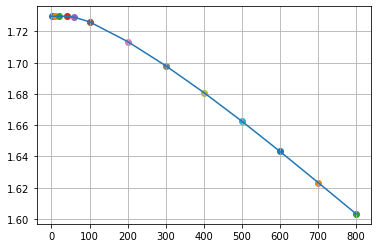

In [47]:
fig, ax = plt.subplots()
ax.grid() 
X=[]
Y=[]
for i in range(len(t_b)):
    X.append(t_b[i][0])
    Y.append(t_b[i][1])
    ax.scatter(t_b[i][0],t_b[i][1])
    
ax.plot(X,Y)

In [48]:
t_b=[]
for i in range(13):
    bb=boundary_total(t_v[i][1],t_v[i][0])
    p0=p_FreeE(t_v[i][1],t_v[i][0])*n_atom
    dde=bb-p0
    ss=ss0*(1.0+t_v[i][1])**2
    de=dde
    es=de/ss* 1.60218 * 10 /2 *1000
    t_b.append([t_v[i][0],es])

In [49]:
t_b

[[1, 334.124878418078],
 [10, 334.124880053701],
 [20, 334.124864087980],
 [40, 334.109443037521],
 [60, 333.978715085174],
 [100, 333.210720064632],
 [200, 329.747733785449],
 [300, 325.444229236118],
 [400, 320.726769616533],
 [500, 315.725283958672],
 [600, 310.519596567484],
 [700, 305.183374301559],
 [800, 299.797035819027]]

# 温度依存性

In [50]:
data_1 = [[513, 379], [573, 365], [623, 357], [673, 346], [723, 336], [773, 325]]
data_2 = [[513, 364], [573, 353], [623, 344], [673, 333], [723, 324], [773, 315]]
data_3= [[513, 320], [573, 310], [623, 300], [673, 293], [723, 284], [773, 276]]

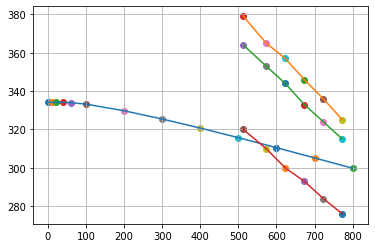

In [51]:
fig, ax = plt.subplots()
ax.grid() 
X=[]
Y=[]
X1=[]
Y1=[]
X2=[]
Y2=[]
X3=[]
Y3=[]
for i in range(len(t_b)):
    X.append(t_b[i][0])
    Y.append(t_b[i][1])
    ax.scatter(t_b[i][0],t_b[i][1])
    
for i in range(len(data_1)):
    X1.append(data_1[i][0])
    Y1.append(data_1[i][1])
    ax.scatter(data_1[i][0],data_1[i][1])
    X2.append(data_2[i][0])
    Y2.append(data_2[i][1])
    ax.scatter(data_2[i][0],data_2[i][1])
    X3.append(data_3[i][0])
    Y3.append(data_3[i][1])
    ax.scatter(data_3[i][0],data_3[i][1])
    
ax.plot(X,Y)
ax.plot(X1,Y1)
ax.plot(X2,Y2)
ax.plot(X3,Y3)

In [52]:
all_ks=[]
for i in range(n_equi):
    for j in range(0,4):
        all_ks.append(all_d[i][j])

In [53]:
vol_m=bisection(p_FreeE(vol,513),0.0,0.04,100)

In [54]:
k_0=ks.subs(x,vol_m)
e_0=e0.subs(x,vol_m)/p_n_atom
ks_disp=[]
for i in range(n_equi):
    for k in range(equi_n[i]):
        for j in range(1,4):
            ks_disp.append(all_d[i][j].subs(x,vol_m))

In [55]:
ks_disp.sort()

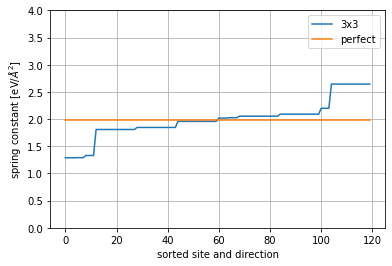

In [57]:
fig, ax = plt.subplots()
ax.grid() 
ax.set_xlabel('sorted site and direction')
ax.set_ylabel('spring constant [eV/$\AA^2$]')
ax.set_ylim([0,4])
X=[]
Y=[]
Y0=[] #k_0
for i in range(len(ks_disp)):
    X.append(i)
    Y.append(ks_disp[i])
    Y0.append(k_0)
    
ax.plot(X,Y,label='3x3')
ax.plot(X,Y0,label='perfect')
ax.legend()